### Name : Vyom Chauhan
### Student ID : 30830192
### Assignment 3

### Introduction
#### In this assignment we are required to read data from multiple files and integrate it into a given schema. The second task of data reshaping consists of studying the effect of normalizing and stadardizing the data in specific columns of the integrated dataframe.

#### Import Statements

In [1]:
# importing required libraries
import pandas as pd
import tabula
import io
from xml.etree import ElementTree as ET
import numpy as np
import shapely.geometry
import datetime
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import preprocessing
import math
import fiona
%matplotlib inline

#### Setting option to display max rows and columns.

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)

## Task 1
### Reading the data files

### Hospital Data
#### Reading the hospital data from the hospital html file. The index were contained in an unnamed column which is then renamed to '' and set as index of the dataframe. The data had 199 entries with no duplicate ids.

In [3]:
# reading the hospital data from th html file
hospitals_df = pd.read_html("file:///C:/Users/vyomc/Downloads/30830192/hospitals.html")[0]
# renaming the unnamed column
hospitals_df.rename(columns = {'Unnamed: 0': ''}, inplace = True)
# changing the index
hospitals_df.set_index([''], inplace = True)

In [4]:
# first few rows of the data
hospitals_df.head()

,id,lat,lng,name
,,,,
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


In [5]:
# information regarding the data
hospitals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      199 non-null    object 
 1   lat     199 non-null    float64
 2   lng     199 non-null    float64
 3   name    199 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [6]:
# checking for any duplicates in id
hospitals_df.nunique(axis=0)

id      199
lat     199
lng     199
name    195
dtype: int64

### Shopping Center Data
#### Reading the shopping center data from the shopingcenters pdf file. The index were contained in an unnamed column which is then renamed to '' and set as index of the dataframe. The data had 119 entries with no duplicate ids.

In [7]:
# reading the shopping center data from the pdf file using Tabula
shopcenter_df = tabula.read_pdf("shopingcenters.pdf", pages = 'all')

In [8]:
# concatinating the tables from different pages
shopcenter_df = pd.concat([shopcenter_df[0] ,shopcenter_df[1], shopcenter_df[2]], ignore_index = True)
# renaming the unnamed column 
shopcenter_df.rename(columns = {'Unnamed: 0': ''}, inplace = True)
# changing the index
shopcenter_df.set_index([''], inplace = True)

In [9]:
# first few rows of the data
shopcenter_df.head()

,sc_id,lat,lng
,,,
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451


In [10]:
# information regarding the data
shopcenter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sc_id   119 non-null    object 
 1   lat     119 non-null    float64
 2   lng     119 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [11]:
# checking for any duplicates in id
shopcenter_df.nunique(axis=0)

sc_id    119
lat      119
lng      119
dtype: int64

### Supermarket Data
#### Reading the supermarket data from the supermarkets excel file. The index were contained in an unnamed column which is then renamed to '' and set as index of the dataframe. The data had 239 entries with no duplicate ids. But on further examination it was found that at same latitude and logitude there were two shopping center ids. Therefore, the first id was kept while the second was discarded making the record count to 238.

In [12]:
# reading the supermarkets data from the excel file
supermarkets_df = pd.read_excel('supermarkets.xlsx')
# renaming the unnamed column
supermarkets_df.rename(columns = {'Unnamed: 0': ''}, inplace = True)
# changing the index
supermarkets_df.set_index([''], inplace = True)

In [13]:
# first few rows of the data
supermarkets_df.head()

,id,lat,lng,type
,,,,
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


In [14]:
# information regarding the data
supermarkets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 238
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      239 non-null    object 
 1   lat     239 non-null    float64
 2   lng     239 non-null    float64
 3   type    239 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.3+ KB


In [15]:
# checking for any duplicates in id
supermarkets_df.nunique(axis=0)

id      239
lat     238
lng     237
type      2
dtype: int64

In [16]:
# dropping the row with duplicate lat and lng attribute
supermarkets_df = supermarkets_df.drop_duplicates(['lat', 'lng'], keep='first').reset_index(drop=True)

### Real estate json
#### Reading the real estate data from the real_state json file. The data had 1010 entries with a few duplicate ids. Therefore, the duplicate records were dropped making the record count to 1006.

In [17]:
# reading the real estate data from the json file
realstate_df1 = pd.read_json('real_state.json')

In [18]:
# first few rows of the data
realstate_df1.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,86831,-37.891383,144.992344,5 Horton Close,16480000,house,2011,5,2,2
1,47772,-37.797656,145.035327,111 Pakington Street,25220000,house,2014,4,2,1
2,81279,-37.988871,145.225751,41 Macpherson Street,11900000,house,2016,3,1,2
3,85619,-37.895698,145.012101,4 Rupert Street,24160000,house,2016,3,2,1
4,64724,-37.800242,145.278718,6 Lusher Road,5625000,house,2012,2,1,2


In [19]:
# information regarding the data
realstate_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    1010 non-null   int64  
 1   lat            1010 non-null   float64
 2   lng            1010 non-null   float64
 3   addr_street    1010 non-null   object 
 4   price          1010 non-null   int64  
 5   property_type  1010 non-null   object 
 6   year           1010 non-null   int64  
 7   bedrooms       1010 non-null   int64  
 8   bathrooms      1010 non-null   int64  
 9   parking_space  1010 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 79.0+ KB


In [20]:
# checking for any duplicates in id
realstate_df1.nunique(axis=0)

property_id      1006
lat              1002
lng              1005
addr_street      1006
price             768
property_type       1
year               11
bedrooms            5
bathrooms           3
parking_space       4
dtype: int64

In [21]:
# removing duplicate rows
realstate_df1.drop_duplicates(keep=False, inplace=True)
# resetting the index
realstate_df1.reset_index(inplace=True)

In [22]:
# again checking for any duplicates
realstate_df1.nunique(axis=0)

index            1002
property_id      1002
lat               998
lng              1001
addr_street      1002
price             766
property_type       1
year               11
bedrooms            5
bathrooms           3
parking_space       4
dtype: int64

### Real estate xml
#### Reading the real estate data from the real_state xml file. The data had 1004 entries with a few duplicate ids. The data had to be read as a string since there were a few characters heading and tailing the xml file therefore it couldn't be directly parsed and had to be parsed as a string instead. The data was then read column wise into a dataframe and the datatypes were changed.

In [23]:
# reading the real estate data from xml file
with io.open('real_state.xml', 'r', encoding='utf-8') as f:
    # reading the xml file as text and removing b''
    contents = f.read()[2:-1]
    # getting the root of xml tree using fromstring function
    root = ET.fromstring(contents)

In [24]:
# initializing an empty dataframe
realstate_df2 = pd.DataFrame()
# writing data to the data frame column wise
for node in root:
    # list of items in column
    data = []
    for item in node:
        # appending items
        data.append(item.text)
    # adding the column to the dataframe
    realstate_df2[node.tag] = data

In [25]:
# changing the datatype of the columns as per the first dataframe
realstate_df2 = realstate_df2.astype({"property_id": int, "lat": float, "lng": float, "price": int, "year": int, "bedrooms": int,\
                "bathrooms": int, "parking_space": int})

In [26]:
# first few rows of the data
realstate_df2.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,47457,-37.703611,145.167748,7 Bayfield Drive,8134000,house,2010,4,1,1
1,77312,-37.934230,145.106920,95 Bunney Road,11640000,house,2015,5,3,2
2,3796,-37.814484,144.887972,7 Fehon Street,7584000,house,2014,2,1,1
3,12942,-37.690104,144.763640,30 Buckingham Street,3159000,house,2014,4,2,1
4,68411,-37.861429,145.026373,25 Llaneast Street,38250000,house,2016,4,1,2


In [27]:
# information regarding the data
realstate_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    1004 non-null   int32  
 1   lat            1004 non-null   float64
 2   lng            1004 non-null   float64
 3   addr_street    1004 non-null   object 
 4   price          1004 non-null   int32  
 5   property_type  1004 non-null   object 
 6   year           1004 non-null   int32  
 7   bedrooms       1004 non-null   int32  
 8   bathrooms      1004 non-null   int32  
 9   parking_space  1004 non-null   int32  
dtypes: float64(2), int32(6), object(2)
memory usage: 55.0+ KB


In [28]:
# checking for any duplicates in id 
realstate_df2.nunique(axis=0)

property_id      1004
lat              1004
lng              1003
addr_street      1002
price             811
property_type       1
year               11
bedrooms            5
bathrooms           3
parking_space       4
dtype: int64

### Property data integration
#### The property data from the above two files is integrated into a single dataframe and the duplicate property_id are dropped. The columns suburb, shopping_center_id etc. are also assigned their default values according to the given schema. The final dataset contains 1976 entries.

In [29]:
# concatinating the two real estate dataframes 
# dropping duplicates based on the column property_id
realstate_df = pd.concat([realstate_df1,realstate_df2], ignore_index=True).drop_duplicates('property_id', keep='first').reset_index(drop=True)
# dropping the index column from the combined df
realstate_df.drop('index', axis=1, inplace=True)

In [30]:
# making new columns and assigning them their default values
realstate_df['suburb'] = 'not available'
realstate_df['Shopping_center_id'] = 'not available'
realstate_df['Hospital_id'] = 'not available'
realstate_df['Supermarket_id'] = 'not available'
realstate_df['Distance_to_sc'] = 0.0
realstate_df['Train_station_id'] = 0
realstate_df['Distance_to_train_station'] = 0.0
realstate_df['travel_min_to_CBD'] = 0
realstate_df['Transfer_flag'] = -1
realstate_df['Distance_to_hospital'] = 0.0
realstate_df['Distance_to_supermarket'] = 0.0

In [31]:
# first few rows of the data
realstate_df.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,Shopping_center_id,Hospital_id,Supermarket_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Distance_to_hospital,Distance_to_supermarket
0,86831,-37.891383,144.992344,5 Horton Close,16480000,house,2011,5,2,2,not available,not available,not available,not available,0.0,0,0.0,0,-1,0.0,0.0
1,47772,-37.797656,145.035327,111 Pakington Street,25220000,house,2014,4,2,1,not available,not available,not available,not available,0.0,0,0.0,0,-1,0.0,0.0
2,81279,-37.988871,145.225751,41 Macpherson Street,11900000,house,2016,3,1,2,not available,not available,not available,not available,0.0,0,0.0,0,-1,0.0,0.0
3,85619,-37.895698,145.012101,4 Rupert Street,24160000,house,2016,3,2,1,not available,not available,not available,not available,0.0,0,0.0,0,-1,0.0,0.0
4,64724,-37.800242,145.278718,6 Lusher Road,5625000,house,2012,2,1,2,not available,not available,not available,not available,0.0,0,0.0,0,-1,0.0,0.0


In [32]:
# some information about the data
realstate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_id                1976 non-null   int64  
 1   lat                        1976 non-null   float64
 2   lng                        1976 non-null   float64
 3   addr_street                1976 non-null   object 
 4   price                      1976 non-null   int64  
 5   property_type              1976 non-null   object 
 6   year                       1976 non-null   int64  
 7   bedrooms                   1976 non-null   int64  
 8   bathrooms                  1976 non-null   int64  
 9   parking_space              1976 non-null   int64  
 10  suburb                     1976 non-null   object 
 11  Shopping_center_id         1976 non-null   object 
 12  Hospital_id                1976 non-null   object 
 13  Supermarket_id             1976 non-null   objec

In [33]:
# count of unique vlues for each column
realstate_df.nunique(axis=0)

property_id                  1976
lat                          1968
lng                          1974
addr_street                  1968
price                        1309
property_type                   1
year                           11
bedrooms                        5
bathrooms                       3
parking_space                   4
suburb                          1
Shopping_center_id              1
Hospital_id                     1
Supermarket_id                  1
Distance_to_sc                  1
Train_station_id                1
Distance_to_train_station       1
travel_min_to_CBD               1
Transfer_flag                   1
Distance_to_hospital            1
Distance_to_supermarket         1
dtype: int64

### Reading Train Data Files
#### The train data is read from different txt files like agency.txt, stops.txt etc. into a dataframe.

In [34]:
# reading the agency data from txt file
agency_df = pd.read_csv('agency.txt', sep=',')

In [35]:
# first few rows of the data
agency_df.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,1,PTV,http://www.ptv.vic.gov.au,Australia/Melbourne,EN


In [36]:
# reading the calendar data from txt file
calendar_df = pd.read_csv('calendar.txt', sep=',')

In [37]:
# first few rows of the data
calendar_df.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018


In [38]:
# reading the calendar dates data from txt file
calendard_df = pd.read_csv('calendar_dates.txt', sep=',')

In [39]:
# first few rows of the data
calendard_df.head()

,service_id,date,exception_type
0,T0,20151103,2
1,T0+a5,20151103,2


In [40]:
# reading the routes data from txt file
routes_df = pd.read_csv('routes.txt', sep=',')

In [41]:
# first few rows of the data
routes_df.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2


In [42]:
# reading the shapes data from txt file
shapes_df = pd.read_csv('shapes.txt', sep=',')

In [43]:
# first few rows of the data
shapes_df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2-ain-mjp-1.1.H,-37.818631,144.951994,1,0.000000
1,2-ain-mjp-1.1.H,-37.817425,144.951050,2,157.543645
2,2-ain-mjp-1.1.H,-37.817241,144.950828,3,185.827916
3,2-ain-mjp-1.1.H,-37.816327,144.950047,4,308.469671
4,2-ain-mjp-1.1.H,-37.816127,144.949950,5,332.239399


In [44]:
# reading the stops data from txt file
stops_df = pd.read_csv('stops.txt', sep=',')

In [45]:
# first few rows of the data
stops_df.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [46]:
# getting stop_id for Flinders Street Railway Station
stops_df[stops_df.stop_name=='Flinders Street Railway Station']

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
29,19854,Flinders Street Railway Station,Melbourne City,-37.818305,144.966964


In [47]:
# reading the trips data from txt file
trips_df = pd.read_csv('trips.txt', sep=',')

In [48]:
# first few rows of the data
trips_df.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [49]:
# reading the stop times data from txt file
stopt_df = pd.read_csv('stop_times.txt', sep=',')

### Formatting departure and arrival  times to time format
#### The departure times need to be changed from string to time format before they can be used. Therefore, first they are split and converted to int and the rows where time is greater than 24 are removed. Then they are formatted into the required time format.

In [50]:
# splitting the departure time and coverting into int
stopt_df['departure_time'] = stopt_df['departure_time'].apply(lambda x: [int(a) for a in x.split(':')])
# removing rows where time is greater than 24
stopt_df = stopt_df[stopt_df.departure_time.apply(lambda x: x[0]) < 24]
# converting departure time to datetime format
stopt_df['departure_time'] = stopt_df.departure_time.apply(lambda x: datetime.time(x[0], x[1], x[2]))

In [51]:
# splitting the arrival time and coverting into int
stopt_df['arrival_time'] = stopt_df['arrival_time'].apply(lambda x: [int(a) for a in x.split(':')])
# removing rows where time is greater than 24
stopt_df = stopt_df[stopt_df.arrival_time.apply(lambda x: x[0]) < 24]
# converting arrival time to datetime format
stopt_df['arrival_time'] = stopt_df.arrival_time.apply(lambda x: datetime.time(x[0], x[1], x[2]))

In [52]:
# first few rows of the data
stopt_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


### Merging dataframes
#### The trips dataframe is filtered with only rows containing headsign as 'City (Flinders Street)', since we are only interested in trips that go to Flinders Street Station. Also, the data in calendar dataframe is filtered based on rows where a train travels on weekdays. These dataframes are then merged.

In [53]:
# filtering trips df where headsign = 'City (Flinders Street)'
temp_df = trips_df[(trips_df.trip_headsign == 'City (Flinders Street)')]
# filtering calendar df where train travels on a weekend
calendar_df = calendar_df[(calendar_df.monday==1) | (calendar_df.tuesday==1) |\
                         (calendar_df.wednesday==1) | (calendar_df.thursday==1) |\
                         (calendar_df.friday==1)]
# merging the two dataframes
merged_df = pd.merge(temp_df, calendar_df)

### Transfer Flag Function
#### The transfer flag function  determines whether there is a direct train to flinders or not. The function determines this by checking if there are items in the join df. The join df is an integration of trips, calendar and stop times data which are filtered on the requirements given in the specifications namely, nearest stop id, departure time between 7 and 9 am, train goes to flinders and runs on weekdays.

In [54]:
# determines whether there is a direct train to flinders
def get_flag(s_id):
    # filters stop time dataframe on departure time between 7-9
    temp_df = stopt_df[(datetime.time(7, 0) <= stopt_df.departure_time) & (stopt_df.departure_time <= datetime.time(9, 0))]
    # filters temp df on stop id
    temp_df = temp_df[(temp_df.stop_id == s_id)]
    # joining the dfs
    join_df = pd.merge(temp_df, merged_df)
    # if df has entries, there is a direct train to flinders
    if len(join_df) > 0:
        return 0
    else:
        return 1

### Average travel time to CBD
#### We first filter the stop times data on departure time and the passed stop id and then join it with the merged data containing trip and day info. Then we create a second join df filtered on stop id for flinders and having same trip ids as join df. We again merge it with the merged df. Next we calculate the average travel time by subtracting the arrival time in join_df2 with the departure time in join_df. Next we calculate the average time in minutes and return it. 

In [55]:
# returns the average time taken to reach CBD from nearest station
def get_time(s_id):
    # if nearest station is flinders travel time is 0
    if s_id == 19854:
        return 0
    # otherwise
    else:
        # filters stop time dataframe on departure time between 7-9 and given stop id
        temp_df = stopt_df[(datetime.time(7, 0) <= stopt_df.departure_time)\
                           & (stopt_df.departure_time <= datetime.time(9, 0))\
                           & (stopt_df.stop_id == s_id)]
        # joining the dfs
        join_df = pd.merge(temp_df, merged_df)
        
        # filters stop times on trip ids in the above join df and stops id for flinders ie 19854
        temp_df2 = stopt_df[(stopt_df.trip_id.isin(join_df.trip_id)) & (stopt_df.stop_id == 19854)]
        # joining the dfs
        join_df2 = pd.merge(temp_df2, merged_df)
        
        # total time
        total = 0
        # counter
        c = 0
        
        # join_df contains nearest stop id data
        for i in range(len(join_df)):
            # trip id for df with nearest stop id
            trip1 = join_df.trip_id[i]
            # dummy date
            date = datetime.date(1, 1, 1)
            # datetime for trip
            datetime1 = datetime.datetime.combine(date, join_df.departure_time[i])
            # join_df2 contains data of flinders stop
            for j in range(len(join_df2)):
                # check if trip id match
                if trip1 == join_df2.trip_id[j]:
                    datetime2 = datetime.datetime.combine(date, join_df2.arrival_time[j])
                    # time difference
                    x = datetime2 - datetime1
                    # total time difference in seconds
                    secs = x.total_seconds()
                    # changing to nearest minute
                    t = secs/60
                    # adding to total time
                    total += t
                    # incrementing counter
                    c += 1
                    break
        # return the integer part of average time
        return int(total/c)

### Nearest distance
#### The below functions help in calculating the distances of the passed latitude and longitude with the geolocations in the passed dataframe. The distances are to train station, shopping center, hospital and supermarket.

In [56]:
# calculates the Haversine Distance
def arc_dist(lat1, lon1, lat2, lon2):
    r = 6378
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 3)

In [57]:
# returns a list of distances to the train stations
def get_train_dist(df, lat, lng):
    # to store distance to different stations
    dist = []
    # for every long and lat in train df calls the arc dist function
    # and appends distances to dist
    for j in range(len(df)):
        # latitude
        lat_df = df.stop_lat[j]
        # longitue
        lng_df = df.stop_lon[j]
        # call the arc_dist function
        dist.append(arc_dist(lat, lng, lat_df, lng_df))
    # list of distances
    return dist

In [58]:
# returns a list of distances to the hospital, supermarket
# or shopping center whichever df is passed
def get_dist(df, lat, lng):
    # to store distances
    dist = []
    # for every long and lat in df calls the arc dist function
    # and appends distances to dist
    for j in range(len(df)):
        lat_df = df.lat[j]
        lng_df = df.lng[j]
        # call the arc_dist function
        dist.append(arc_dist(lat, lng, lat_df, lng_df))
    # list of distances
    return dist

### Get Suburb Function
#### The function below is used to determine what suburb the property belongs to. Thois is achieved by using fiona and shapely to read the shape file and then generate a point and boundary in which the point lies. The function then gets the suburb name from the file and returns it.

In [59]:
# determine the suburb for property
def get_suburb(lat, lng):
    # open shape file
    with fiona.open(r"C:\Users\vyomc\Downloads\vic_suburb_boundary\VIC_LOCALITY_POLYGON_shp.shp") as fiona_collection:
        # generate point using the passed long and lat
        point = shapely.geometry.Point(lng, lat)
        for record in fiona_collection:
            # Use Shapely to create the polygon
            shape = shapely.geometry.asShape(record['geometry'])
            # return suburb name if shape contains point
            if shape.contains(point):
                return record['properties']['VIC_LOCA_2']

### Formatting the realstate dataframe
#### Herein, we call all the functions defined above to populate the columns mentioned in the schema namely- Shopping_center_id, Distance_to_sc, Supermarket_id, Distance_to_supermarket, Hospital_id, Distance_to_hospital, Train_station_id, Distance_to_train_station, suburb, Transfer_flag and travel_min_to_CBD. We go row by row first extracting the latitiude and longitude of the property and then go on to call the above fucntions.

In [60]:
# each row in realstate_df
for i in range(len(realstate_df)):
    # lat
    lat = realstate_df.lat[i]
    # long
    lng = realstate_df.lng[i]
    
    # calling the get_dist function
    sc_dist = get_dist(shopcenter_df, lat, lng)
    # nearest shopcenter id
    realstate_df['Shopping_center_id'][i] = shopcenter_df.sc_id[sc_dist.index(min(sc_dist))]
    # distance to nearest shopcenter
    realstate_df['Distance_to_sc'][i] = min(sc_dist)
    
    # calling the get_dist function
    sm_dist = get_dist(supermarkets_df, lat, lng)
    # nearest supermarket id
    realstate_df['Supermarket_id'][i] = supermarkets_df.id[sm_dist.index(min(sm_dist))]
    # distance to nearest supermarket
    realstate_df['Distance_to_supermarket'][i] = min(sm_dist)
    
    # calling the get_dist function
    hos_dist = get_dist(hospitals_df, lat, lng)
    # nearest hospital id
    realstate_df['Hospital_id'][i] = hospitals_df.id[hos_dist.index(min(hos_dist))]
    # distance to nearest hospital 
    realstate_df['Distance_to_hospital'][i] = min(hos_dist)
    
    # calling the get_train_dist function
    train_dist = get_train_dist(stops_df, lat, lng)
    # nearest station id
    realstate_df['Train_station_id'][i] = stops_df.stop_id[train_dist.index(min(train_dist))]
    # distance to nearest train station
    realstate_df['Distance_to_train_station'][i] = min(train_dist)
    
    # suburb for property
    realstate_df['suburb'][i] = get_suburb(lat, lng)
    
    # if there is a direct train to flinders 
    realstate_df['Transfer_flag'][i] = get_flag(realstate_df['Train_station_id'][i])
    
    # average travel time to flinders
    realstate_df['travel_min_to_CBD'][i] = get_time(realstate_df['Train_station_id'][i])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: Setting

In [61]:
# writing the data to the output file in csv format
realstate_df.to_csv('30830192_A3_solution.csv', index = False)

## Task 2
### Data Normalisation and Transformation
#### When one or more datasets affects results disproportionately, normalization or scaling gives a level playing field. We further observe the effects of normalization and scaling on the colums 'price', 'Distance_to_sc', 'travel_min_to_CBD' and 'Distance_to_hospital'.

In [62]:
# slicing the dataframe
trans_df = realstate_df[['price', 'Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital']]

In [63]:
# first few rows
trans_df.head()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital
0,16480000,2.725,16,1.630
1,25220000,2.539,20,1.358
2,11900000,0.958,53,0.727
3,24160000,3.466,19,0.118
4,5625000,0.405,50,2.199


In [64]:
# statistical information about the data
trans_df.describe()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital
count,1.976000e+03,1976.000000,1976.000000,1976.000000
mean,9.183480e+06,2.527699,32.987854,2.141770
std,5.835586e+06,1.372881,12.243887,1.770396
min,1.017000e+06,0.177000,4.000000,0.081000
25%,5.400000e+06,1.419000,23.000000,0.963000
50%,7.585500e+06,2.302500,33.000000,1.619000
75%,1.107000e+07,3.419750,41.000000,2.675750
max,4.420000e+07,5.959000,59.000000,9.360000


### Z-Score Normalisation (standardisation): 

#### We use scikit-learn library to standardise data (mean=0, SD=1). Standardization of datasets is a common requirement for many machine learning estimators which might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In [65]:
# using standard scaler to fit the model on the complete dataset
std_scale = preprocessing.StandardScaler().fit(trans_df)
# using the model to transform data
std_df = std_scale.transform(trans_df)
# 2-d array of scaled values
std_df[0:5]

array([[ 1.25066554,  0.1437492 , -1.38780721, -0.2891443 ],
       [ 2.74875192,  0.00823339, -1.06103087, -0.44282117],
       [ 0.46562714, -1.143651  ,  1.63487394, -0.79932892],
       [ 2.56706181,  0.68362671, -1.14272496, -1.14340692],
       [-0.60994403, -1.54655553,  1.38979169,  0.03233415]])

In [66]:
# converting array to df
std_df = pd.DataFrame(std_df, columns = ['z_price', 'z_sc_dist', 'z_travel_min', 'z_hos_dist'])
# concatinating it with the original df
std_df = pd.concat([trans_df, std_df], axis=1)
# first few rows
std_df.head()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,z_price,z_sc_dist,z_travel_min,z_hos_dist
0,16480000,2.725,16,1.630,1.250666,0.143749,-1.387807,-0.289144
1,25220000,2.539,20,1.358,2.748752,0.008233,-1.061031,-0.442821
2,11900000,0.958,53,0.727,0.465627,-1.143651,1.634874,-0.799329
3,24160000,3.466,19,0.118,2.567062,0.683627,-1.142725,-1.143407
4,5625000,0.405,50,2.199,-0.609944,-1.546556,1.389792,0.032334


#### Scaled data has zero mean and unit variance

In [67]:
# statistical info for scaled data
std_df.describe()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,z_price,z_sc_dist,z_travel_min,z_hos_dist
count,1.976000e+03,1976.000000,1976.000000,1976.000000,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03
mean,9.183480e+06,2.527699,32.987854,2.141770,-1.561953e-17,1.047506e-17,9.888626e-17,-6.472555e-17
std,5.835586e+06,1.372881,12.243887,1.770396,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00
min,1.017000e+06,0.177000,4.000000,0.081000,-1.399782e+00,-1.712672e+00,-2.368136e+00,-1.164311e+00
25%,5.400000e+06,1.419000,23.000000,0.963000,-6.485103e-01,-8.077758e-01,-8.159486e-01,-6.659916e-01
50%,7.585500e+06,2.302500,33.000000,1.619000,-2.739030e-01,-1.640757e-01,9.922359e-04,-2.953592e-01
75%,1.107000e+07,3.419750,41.000000,2.675750,3.233604e-01,6.499299e-01,6.545449e-01,3.016924e-01
max,4.420000e+07,5.959000,59.000000,9.360000,6.002033e+00,2.499976e+00,2.125038e+00,4.078217e+00


#### We obeserve that the values for distance, travel time and price are now more clustered near zero. Since the columns Distance to shopping center and Distance to hospital already had a standard deviation cloes to one, we do not see a significant change in spread. Although the values are now scaled we observe that they follow the exact same distribution as they did earlier.

(<matplotlib.axes._subplots.AxesSubplot at 0x194eefd4548>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194eefd4548>)

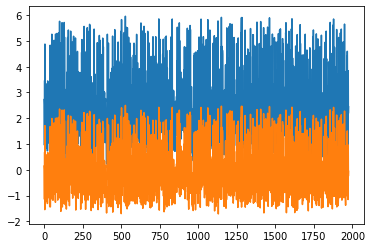

In [68]:
# plotting the original and scaled values
std_df['Distance_to_sc'].plot(), std_df['z_sc_dist'].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x194f1c6efc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194f1c6efc8>)

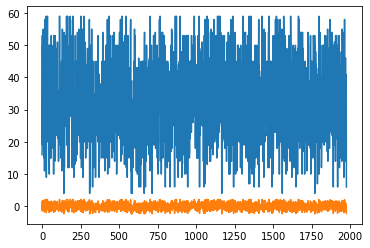

In [69]:
# plotting the original and scaled values
std_df['travel_min_to_CBD'].plot(), std_df['z_travel_min'].plot()

#### Since the mean and standard deviation of values in the price column were so high, we see a line when we plot the normalised values along with the original values, which on plotting separately shows a graph with same distribution as the original values but now centered around 0.

(<matplotlib.axes._subplots.AxesSubplot at 0x194f1c6a2c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194f1c6a2c8>)

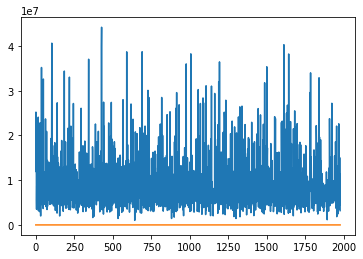

In [70]:
# plotting the original and scaled values
std_df['price'].plot(), std_df['z_price'].plot()

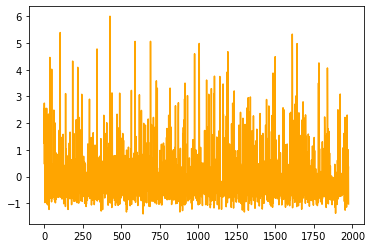

In [71]:
# plotting the scaled values
std_df['z_price'].plot(color='orange')

(<matplotlib.axes._subplots.AxesSubplot at 0x194f4677788>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194f4677788>)

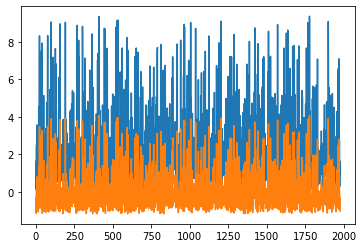

In [72]:
# plotting the original and scaled values
std_df['Distance_to_hospital'].plot(), std_df['z_hos_dist'].plot()

### MinMax Noramlisation:

#### Another form of standardization is scaling the features to lie between a given minimum and maximum value, often [0, 1] so that the maximum absolute value of each feature is scaled to unit size. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

In [73]:
# using minmax scaler to fit the model on the complete dataset
minmax_scale = preprocessing.MinMaxScaler().fit(trans_df)
# using the model to transform data
minmax_df = minmax_scale.transform(trans_df)
# 2-d array of scaled values
minmax_df[0:5]

array([[0.35808073, 0.44067797, 0.21818182, 0.16693609],
       [0.56047519, 0.40850917, 0.29090909, 0.13762259],
       [0.25202047, 0.13507437, 0.89090909, 0.06961957],
       [0.53592849, 0.56883431, 0.27272727, 0.0039875 ],
       [0.10670866, 0.03943272, 0.83636364, 0.22825736]])

In [74]:
# converting array to df
minmax_df = pd.DataFrame(minmax_df, columns = ['mm_price', 'mm_sc_dist', 'mm_travel_min', 'mm_hos_dist'])
# concatinating it with the original df
minmax_df = pd.concat([trans_df, minmax_df], axis=1)
# first few rows
minmax_df.head()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,mm_price,mm_sc_dist,mm_travel_min,mm_hos_dist
0,16480000,2.725,16,1.630,0.358081,0.440678,0.218182,0.166936
1,25220000,2.539,20,1.358,0.560475,0.408509,0.290909,0.137623
2,11900000,0.958,53,0.727,0.252020,0.135074,0.890909,0.069620
3,24160000,3.466,19,0.118,0.535928,0.568834,0.272727,0.003987
4,5625000,0.405,50,2.199,0.106709,0.039433,0.836364,0.228257


#### Scaled data lies in the range [0-1] with a reduced standard deviation.

In [75]:
# statistical info for scaled data
minmax_df.describe()

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,mm_price,mm_sc_dist,mm_travel_min,mm_hos_dist
count,1.976000e+03,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,9.183480e+06,2.527699,32.987854,2.141770,0.189113,0.406555,0.527052,0.222090
std,5.835586e+06,1.372881,12.243887,1.770396,0.135136,0.237441,0.222616,0.190796
min,1.017000e+06,0.177000,4.000000,0.081000,0.000000,0.000000,0.000000,0.000000
25%,5.400000e+06,1.419000,23.000000,0.963000,0.101498,0.214805,0.345455,0.095053
50%,7.585500e+06,2.302500,33.000000,1.619000,0.152108,0.367606,0.527273,0.165751
75%,1.107000e+07,3.419750,41.000000,2.675750,0.232800,0.560835,0.672727,0.279637
max,4.420000e+07,5.959000,59.000000,9.360000,1.000000,1.000000,1.000000,1.000000


#### We obeserve that the values for distance, travel time and price are now in the range [0-1]. Since there were no negative or 0 values in the datawe observe that the data follows the same distribution as earlier.

(<matplotlib.axes._subplots.AxesSubplot at 0x194f1c62ec8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194f1c62ec8>)

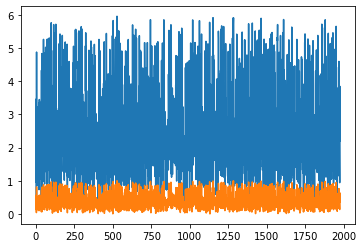

In [76]:
# plotting the original and scaled values
minmax_df['Distance_to_sc'].plot(), minmax_df['mm_sc_dist'].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x194f0c33108>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194f0c33108>)

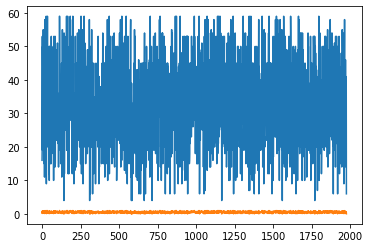

In [77]:
# plotting the original and scaled values
minmax_df['travel_min_to_CBD'].plot(), minmax_df['mm_travel_min'].plot()

#### Since the mean and standard deviation of values in the price column were so high, we see a line when we plot the minmax values along with the original values, which on plotting separately shows a graph with same distribution as the original values but now lying in the range [0-1].

(<matplotlib.axes._subplots.AxesSubplot at 0x194f9063d08>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194f9063d08>)

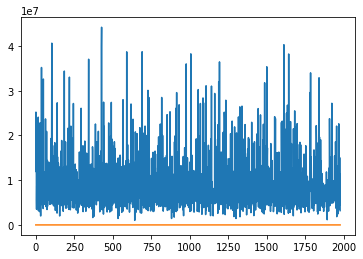

In [78]:
# plotting the original and scaled values
minmax_df['price'].plot(), minmax_df['mm_price'].plot()

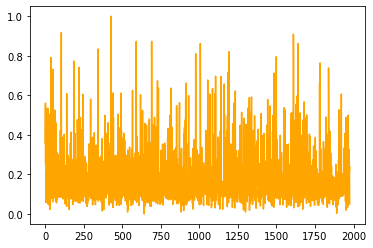

In [79]:
# plotting the scaled values
minmax_df['mm_price'].plot(color='orange')

(<matplotlib.axes._subplots.AxesSubplot at 0x194f3aadcc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194f3aadcc8>)

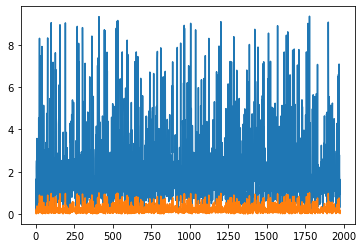

In [80]:
# plotting the original and scaled values
minmax_df['Distance_to_hospital'].plot(), minmax_df['mm_hos_dist'].plot()

### Plotting normalized, minmax and original data
#### The plot below shows a sample of normalized(red), minmax(blue) and original data(green) for the columns Distance to Hospital and Shopcenter. We can see how standarization and minmax normalization reduce the spread of the data without affecting its distibution.

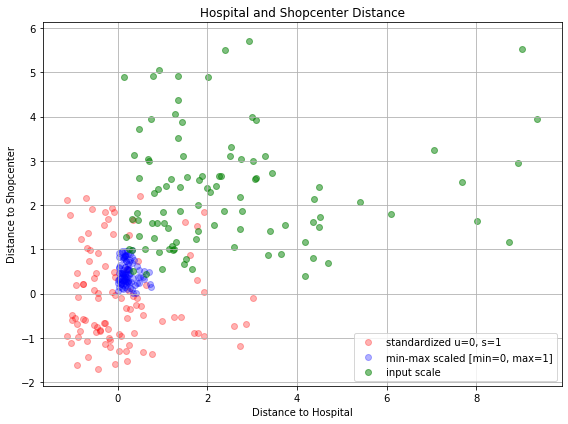

In [81]:
# plot size
plt.figure(figsize=(8,6))
# standardized values scatter plot
plt.scatter(std_df['z_hos_dist'].sample(frac=0.05), std_df['z_sc_dist'].sample(frac=0.05), color='red',
             label='standardized u=0, s=1', alpha=0.3)
# minmax normalized values plot
plt.scatter(minmax_df['mm_hos_dist'].sample(frac=0.05), minmax_df['mm_sc_dist'].sample(frac=0.05),
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)
# original values plot
plt.scatter(trans_df['Distance_to_hospital'].sample(frac=0.05), trans_df['Distance_to_sc'].sample(frac=0.05),
            color='green', label='input scale', alpha=0.5)
plt.title('Hospital and Shopcenter Distance')
plt.xlabel('Distance to Hospital')
plt.ylabel('Distance to Shopcenter')
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid()

### Log Transformation
#### We can see from the scatter plot below that there is no such defined linear relation between the distance to hospital and the price of the property. But when we apply the log transformation we see that there is a slight negative correlation between price and distance to hospital i.e when the distance to hospital increases, the price decreases. Also we can see that the price is positively skewed but when we apply the log transformation to it, the distribution becomes close to normal distribution.

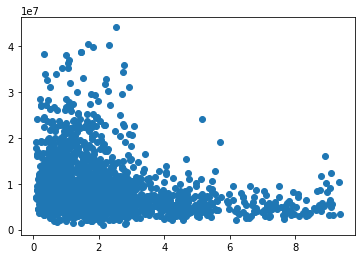

In [82]:
# plotting scatter pot of original values
plt.scatter(trans_df.Distance_to_hospital, trans_df.price)

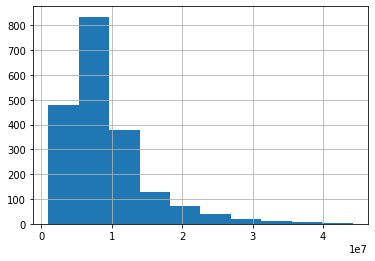

In [83]:
# histogram of price
trans_df.price.hist()

In [84]:
# naming new columns
trans_df['log_price'] = None
trans_df['log_dist_hos'] = None
# counter
i = 0
# for all rows
for i in range(len(trans_df)):
    # transforming to log scale
    trans_df['log_price'][i] = math.log(trans_df['price'][i])
    trans_df['log_dist_hos'][i] = math.log(trans_df['Distance_to_hospital'][i])
# first few rows
trans_df.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,log_price,log_dist_hos
0,16480000,2.725,16,1.630,16.6177,0.48858
1,25220000,2.539,20,1.358,17.0431,0.306013
2,11900000,0.958,53,0.727,16.292,-0.318829
3,24160000,3.466,19,0.118,17.0002,-2.13707
4,5625000,0.405,50,2.199,15.5427,0.788003


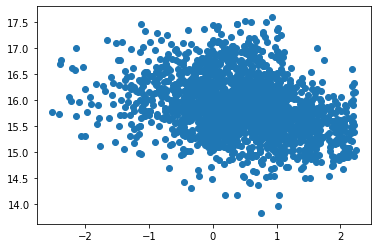

In [85]:
# plotting scatter plot of log transformed values
plt.scatter(trans_df.log_dist_hos, trans_df.log_price)

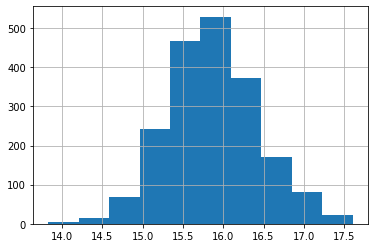

In [86]:
# histogram of log(price)
trans_df.log_price.hist()

### Power Transformation
#### When we apply the root transformation we see that there is a slight linear relationship between price and distance to hospital (when the distance to hospital increases, the price decreases). Also we can see that the price is positively skewed but when we apply the root transformation to it, the distribution is becomes a bit less positive skewed.

In [87]:
# naming new columns
trans_df['root_price'] = None
trans_df['root_dist_hos'] = None
# counter
i = 0
# for all rows
for i in range(len(trans_df)):
    # root transformation
    trans_df['root_price'][i] = math.sqrt(trans_df['price'][i])
    trans_df['root_dist_hos'][i] = math.sqrt(trans_df['Distance_to_hospital'][i])
trans_df.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,price,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,log_price,log_dist_hos,root_price,root_dist_hos
0,16480000,2.725,16,1.630,16.6177,0.48858,4059.56,1.27671
1,25220000,2.539,20,1.358,17.0431,0.306013,5021.95,1.16533
2,11900000,0.958,53,0.727,16.292,-0.318829,3449.64,0.852643
3,24160000,3.466,19,0.118,17.0002,-2.13707,4915.28,0.343511
4,5625000,0.405,50,2.199,15.5427,0.788003,2371.71,1.4829


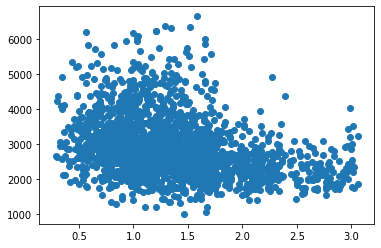

In [88]:
# plotting scatter plot of power transformed values
plt.scatter(trans_df.root_dist_hos, trans_df.root_price)

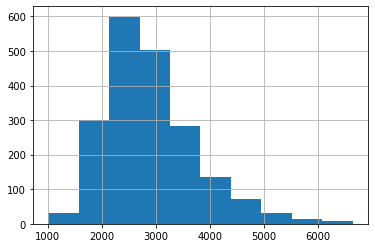

In [89]:
# histogram of sqrt(price)
trans_df.root_price.hist()

### Boxcox Transformation

#### We can see from the scatter plot that there is no such defined linear relation between the distance to hospital and the price of the property. But when we apply the boxcox transformation we observe the price to vary linearly with distance to hospital(when the distance to hospital increases, the price decreases). Also we can see that the price is positively skewed but when we apply the boxcox transformation to it, the distribution becomes close to normal distribution.

In [90]:
# naming new columns
trans_df['box_price'] = None
trans_df['box_dist_hos'] = None
# applying boxcox transformation
trans_df['box_price'], f_lambda = stats.boxcox(trans_df.price)
trans_df['box_dist_hos'], f_lambda = stats.boxcox(trans_df.Distance_to_hospital)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

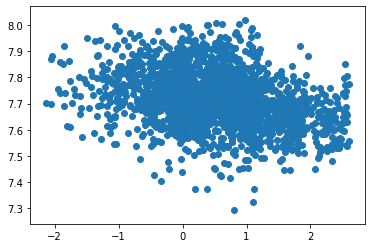

In [91]:
# plotting scatter plot of boxcox transformed values
plt.scatter(trans_df.box_dist_hos, trans_df.box_price)

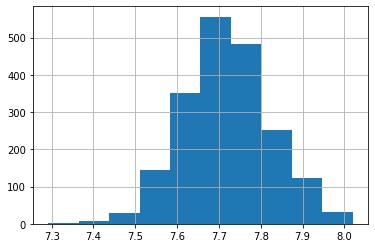

In [92]:
# histogram of boxcox transformed price
trans_df.box_price.hist()

### Conlusion
#### Both standarisation and minmax normalization can be used to scale the data as they both preserve the data distribution. In order to preserve the condition of linearity while fitting a linear regression model to the data, the best transforamtion that can be used is the log transformation.

## References
#### https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
#### https://scikit-learn.org/stable/modules/preprocessing.html
#### https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
#### https://stackoverflow.com/questions/8031594/how-do-i-work-out-which-shapefile-suburb-contains-a-given-lat-lon-point-in-php
#### https://stackoverflow.com/questions/45265044/how-to-check-a-time-is-between-two-times-in-python
#### https://stackoverflow.com/questions/23667369/drop-all-duplicate-rows-across-multiple-columns-in-python-pandas